Author:Xiaoman Dong

The structure of this notebook is as follows:
1. Exploratory Data Analysis
2. Experiment Analysis 
    2.1 Conversion rate of control and variant group
        2.1.1 Conversion rate by Channel
        2.1.2 Conversion rate by landing method
        2.1.3 Conversion rate by user type
    2.2 Bounce rate of control and variant group
        2.2.1 Conversion rate by Channel
        2.2.2 Conversion rate by landing method
        2.2.3 Conversion rate by user type
    2.3 Supplementary analysis: New customer gained rate 
        2.3.1 New customer gained rate based on channels
        2.3.2 New customer gained rate based on landing method
    2.4 Supplementary analysis: rate of users purchased directly
3. Hypothesis Test: Two-Sample Z-test on dataset
4. Algorithm design
    4.1 logistic regression
    4.2 Random forest

1. Exploratory Data Analysis
First, we load dataset and read first five rows in the dataset

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

#Read data
df = pd.read_excel('Product.xlsx')
df.head()

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
0,2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
3,2014-10-10,Affiliate,Returning User,0,0,1,196,159
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332


In [2]:
print("The dataset has", df.shape[0], "rows and", df.shape[1],"columns in total")

The dataset has 1260 rows and 8 columns in total


In [3]:
#Check if there is any missing value in each variable, if so, we would remove the missing values
missing_df = pd.DataFrame(df.isnull().sum()).reset_index()
missing_df.columns = ['column', 'missing value count']
missing_df

,column,missing value count
0,Date,0
1,Channel,0
2,User Type,0
3,Land,0
4,Bounce,0
5,Purchase,0
6,Visitors_Control,0
7,Visitors_Variant,0


Now, we see that this dataset is very clean and doesn't contain missing value. 
Hence, we could move on to next step and see the conversion rate of control and variant group

2 Experiment Analysis
2.1 Conversion rate of control and variant group

In [4]:
#Calculate the conversion rate of control group
CR_Control=df.loc[df['Purchase'] == 1].Visitors_Control.sum()/df.Visitors_Control.sum()
#Calculate the conversion rate of variant group
CR_Variant=df.loc[df['Purchase'] == 1].Visitors_Variant.sum()/df.Visitors_Variant.sum()
#Calculate the aggregate relative difference
arf=abs(CR_Control-CR_Variant)/CR_Control

print("The conversion rate of control group is: ", '{percent:.2%}'.format(percent=CR_Control))
print("The conversion rate of variant group is: ", '{percent:.2%}'.format(percent=CR_Variant))
print("The aggregate relative difference of variant group vs control group is", '{percent:.2%}'.format(percent=arf))

The conversion rate of control group is:  5.56%
The conversion rate of variant group is:  5.31%
The aggregate relative difference of variant group vs control group is 4.55%


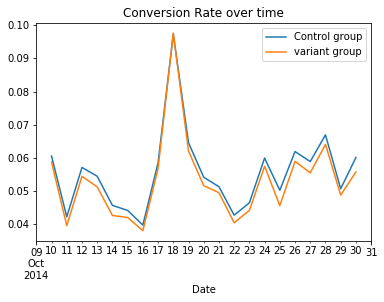

In [8]:
import matplotlib.pyplot as plt
#Group the data and aggregate the purchase and visitors in control group 
user_purchases=df.groupby('Date')['Visitors_Control'].sum()
#Group the data and aggregate the purchase and visitors in variant group 
user_purchases_va=df.groupby('Date')['Visitors_Variant'].sum()

#Add two new columns named Purchased_control, Purchased_variant respectively
df['Purchased_control']=df.Purchase * df.Visitors_Control
df['Purchased_variant']=df.Purchase * df.Visitors_Variant

user_purchased=df.groupby('Date')['Purchased_control'].sum()
user_purchased_va=df.groupby('Date')['Purchased_variant'].sum()

#Conversion rate of two groups
user_purchased_rate_control=user_purchased/user_purchases
user_purchased_rate_variant=user_purchased_va/user_purchases_va

#plot the graph
plt.title("Conversion Rate over time")
user_purchased_rate_control.plot(x='Date', y='user_purchased_rate_control', label='Control group')
user_purchased_rate_variant.plot(x='Date', y='user_purchased_rate_variant', label='variant group')
plt.legend()
plt.show()

2.1.1 Conversion rate by channel

In [6]:
#Group the data by channel in control group
user_channel_co_purchased=df.groupby('Channel')['Purchased_control'].sum()
#Group the data by channel in variant group
user_channel_va_purchased=df.groupby('Channel')['Purchased_variant'].sum()

total_channel_control=df.groupby('Channel')['Visitors_Control'].sum()
total_channel_variant=df.groupby('Channel')['Visitors_Variant'].sum()


Conversion_channel_control=user_channel_co_purchased/total_channel_control
Conversion_channel_variant=user_channel_va_purchased/total_channel_variant


print("The conversion rate by Affiliate in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[0]))
print("The conversion rate by Direct in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[1]))
print("The conversion rate by Email in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[2]))
print("The conversion rate by Paid Search in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[3]))
print("The conversion rate by SEO in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[4]))
print("The conversion rate by Social Media in control group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_control[5]))
print("The conversion rate by Affiliate in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[0]))
print("The conversion rate by Direct in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[1]))
print("The conversion rate by Email in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[2]))
print("The conversion rate by Paid Search in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[3]))
print("The conversion rate by SEO in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[4]))
print("The conversion rate by Social Media in variant group is: ",
      '{percent:.2%}'.format(percent=Conversion_channel_variant[5]))

The conversion rate by Affiliate in control group is:  5.55%
The conversion rate by Direct in control group is:  5.51%
The conversion rate by Email in control group is:  5.89%
The conversion rate by Paid Search in control group is:  5.70%
The conversion rate by SEO in control group is:  5.34%
The conversion rate by Social Media in control group is:  6.28%
The conversion rate by Affiliate in variant group is:  5.49%
The conversion rate by Direct in variant group is:  5.17%
The conversion rate by Email in variant group is:  5.53%
The conversion rate by Paid Search in variant group is:  5.44%
The conversion rate by SEO in variant group is:  5.06%
The conversion rate by Social Media in variant group is:  6.31%


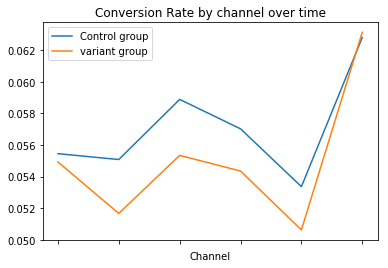

In [7]:
#plot the graph 
import matplotlib.pyplot as plt
plt.title("Conversion Rate by channel over time")
Conversion_channel_control.plot(x='Channel',y='Conversion_channel_control', label='Control group')
Conversion_channel_variant.plot(x='Channel',y='Conversion_channel_variant', label='variant group')
plt.legend()
plt.show()

In [9]:
test_df=df.drop(columns=['Visitors_Control','Purchased_control'])
control_df=df.drop(columns=['Visitors_Variant','Purchased_variant'])

def conversion_barplot(test_df, control_df, col):
    test = (test_df.groupby(col).Purchased_variant.sum()/test_df.groupby(col).Visitors_Variant.sum()).reset_index()
    control = (control_df.groupby(col).Purchased_control.sum()/control_df.groupby(col).Visitors_Control.sum()).reset_index()
    merge_df = pd.merge(control, test, on=col)
    merge_df.columns = [col, 'Control', 'Variant']  
    merge_df.sort_values(by='Variant', ascending=False).head(10).plot(x=col, kind='bar')
    plt.legend(loc='center left', bbox_to_anchor=(0.3, 1.1))
    plt.savefig('demo.png', transparent=True, bbox_inches='tight')

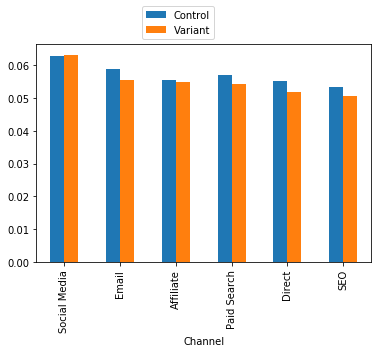

In [10]:
conversion_barplot(test_df, control_df, 'Channel')

2.1.2 Conversion rate by landing method

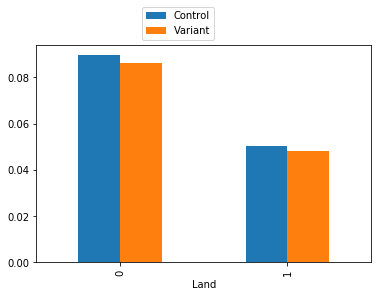

In [11]:
conversion_barplot(test_df, control_df, 'Land')

2.1.3 Conversion rate by user type

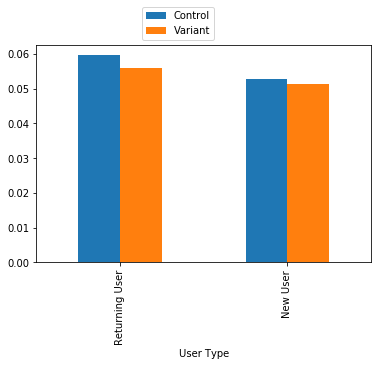

In [12]:
conversion_barplot(test_df, control_df, 'User Type')

2.2 Bounce rate of control and variant group

In [14]:
#Calculate the bounce rate of control group
BR_Control=df.loc[df['Bounce'] == 1].Visitors_Control.sum()/df.Visitors_Control.sum()
#Calculate the bounce rate of variant group
BR_Variant=df.loc[df['Bounce'] == 1].Visitors_Variant.sum()/df.Visitors_Variant.sum()
#Calculate the aggregate relative difference of bounce rate
arf_br=abs(BR_Control-BR_Variant)/BR_Control

print("The bounce rate of control group is", '{percent:.2%}'.format(percent=BR_Control))
print("The bounce rate of variant group is", '{percent:.2%}'.format(percent=BR_Variant))
print("The aggregate relative difference rate of bounce rate of variant group vs control group is", 
      '{percent:.2%}'.format(percent=arf_br))

The bounce rate of control group is 34.47%
The bounce rate of variant group is 35.93%
The aggregate relative difference rate of bounce rate of variant group vs control group is 4.23%


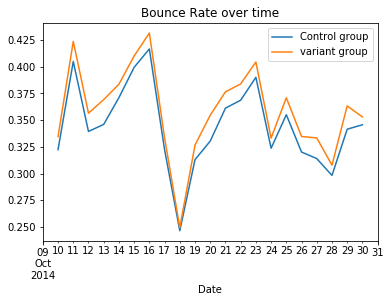

In [15]:
#Group the data of total landing homepage visitors in control group 
Total_user_control_br=df.groupby('Date')['Visitors_Control'].sum()
#Group the data of total landing homepage visitors in variant group 
Total_user_variant_br=df.groupby('Date')['Visitors_Variant'].sum()

#Add two new columns named bounced_control, bounced_variant respectively
df['bounced_control']=df.Bounce * df.Visitors_Control
df['bounced_variant']=df.Bounce * df.Visitors_Variant

user_bounced_cr=df.groupby('Date')['bounced_control'].sum()
user_bounced_va=df.groupby('Date')['bounced_variant'].sum()

#Bounce rate of two groups
user_bounced_rate_control=user_bounced_cr/Total_user_control_br
user_bounced_rate_variant=user_bounced_va/Total_user_variant_br

#plot the graph
plt.title("Bounce Rate over time")
user_bounced_rate_control.plot(x='Date', y='user_bounced_rate_control', label='Control group')
user_bounced_rate_variant.plot(x='Date', y='user_bounced_rate_control', label='variant group')
plt.legend()
plt.show()

From the graphs above, we could clearly see that on 10/18/2014, the conversion rate reaches at a peak 
and the bounce rateis also at the lowest point over this period. Also, conversion rate and bounce rate seems
to have a negative relationship, which means as conversion rate increases, the bounce rate would decrease. 

2.2.1 Bounce rate by channel

In [16]:
test_df_1=df.drop(columns=['Visitors_Control','Purchased_control','bounced_control'])
control_df_1=df.drop(columns=['Visitors_Variant','Purchased_variant','bounced_variant'])

def bounce_barplot(test_df_1, control_df_1, col):
    test_1 = (test_df_1.groupby(col).bounced_variant.sum()/test_df_1.groupby(col).Visitors_Variant.sum()).reset_index()
    control_1 = (control_df_1.groupby(col).bounced_control.sum()/control_df_1.groupby(col).Visitors_Control.sum()).reset_index()
    merge_df_1 = pd.merge(control_1, test_1, on=col)
    merge_df_1.columns = [col, 'Control', 'Variant']  
    merge_df_1.sort_values(by='Variant', ascending=False).head(10).plot(x=col, kind='bar')
    plt.legend(loc='center left', bbox_to_anchor=(0.3, 1.1))
    plt.savefig('demo.png', transparent=True, bbox_inches='tight')

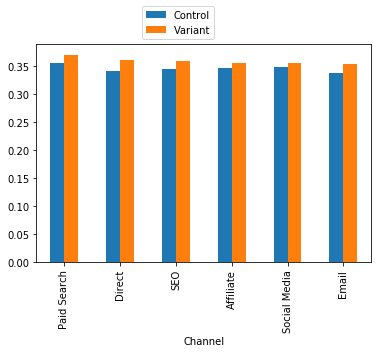

In [17]:
bounce_barplot(test_df_1, control_df_1, 'Channel')

2.2.2 Bounce rate by landing method

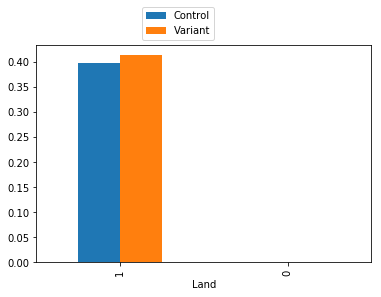

In [18]:
bounce_barplot(test_df_1, control_df_1, 'Land')

There is an interesting notice also a true fact  that for the user who navigate to our homepage from another page on our site, the bounce rate is 0 for both groups

2.2.3 Bounce rate by user type

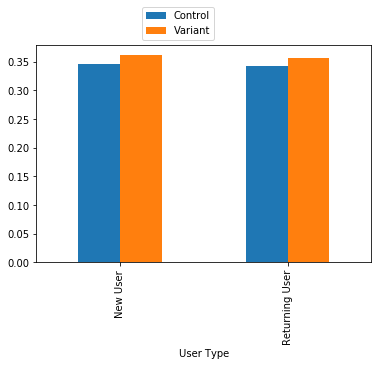

In [19]:
bounce_barplot(test_df_1, control_df_1, 'User Type')

2.3 Supplementary Analysis

2.3.1 New customer conversion rate, which is calculated by the number of new users who made a purchase, divided by
the number of users in a whole group

In [20]:
df['Purchased_control']=df.Purchase * df.Visitors_Control
df['Purchased_variant']=df.Purchase * df.Visitors_Variant

Total_new_user_gained_rate = df.loc[df['User Type']=='New User'].Purchased_control.sum() / df.Visitors_Control.sum()
Total_new_user_gained_rate_va = df.loc[df['User Type']=='New User'].Purchased_variant.sum() / df.Visitors_Variant.sum()

print("The rate of new user gained in control group is: ", '{percent:.2%}'.format(percent=Total_new_user_gained_rate))
print("The rate of new user gained in variant group is: ", '{percent:.2%}'.format(percent=Total_new_user_gained_rate_va))

The rate of new user gained in control group is:  3.14%
The rate of new user gained in variant group is:  3.07%


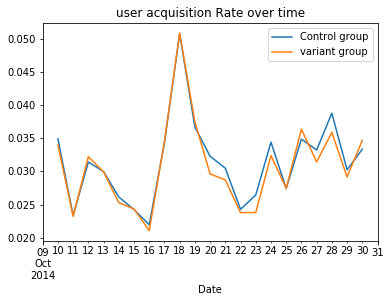

In [22]:
#Add two new columns named Purchased_control, Purchased_variant respectively
df['Purchased_control']=df.Purchase * df.Visitors_Control
df['Purchased_variant']=df.Purchase * df.Visitors_Variant

df_new=df.loc[df['User Type']=='New User']
new_user_purchased=df_new.groupby('Date')['Purchased_control'].sum()
new_user_purchased_va=df_new.groupby('Date')['Purchased_variant'].sum()

#user gained rate of two groups
Total_new_user_gained_rate = new_user_purchased/ user_purchases
Total_new_user_gained_rate_va = new_user_purchased_va/user_purchases_va

#Plot user gained rate
plt.title("user acquisition Rate over time")
Total_new_user_gained_rate.plot(x='Date', y='Total_new_user_gained_rate', label='Control group')
Total_new_user_gained_rate_va.plot(x='Date', y='Total_new_user_gained_rate_va', label='variant group')
plt.legend()
plt.show()



In [23]:
test_df_2=df_new.drop(columns=['Visitors_Control','Purchased_control'])
control_df_2=df_new.drop(columns=['Visitors_Variant','Purchased_variant'])

def user_barplot(test_df_2, control_df_2, col):
    test = (test_df_2.groupby(col).Purchased_variant.sum()/test_df_2.groupby(col).Visitors_Variant.sum()).reset_index()
    control = (control_df_2.groupby(col).Purchased_control.sum()/control_df_2.groupby(col).Visitors_Control.sum()).reset_index()
    merge_df = pd.merge(control, test, on=col)
    merge_df.columns = [col, 'Control', 'Variant']  
    merge_df.sort_values(by='Variant', ascending=False).head(10).plot(x=col, kind='bar')
    plt.legend(loc='center left', bbox_to_anchor=(0.3, 1.1))
    plt.savefig('demo.png', transparent=True, bbox_inches='tight')

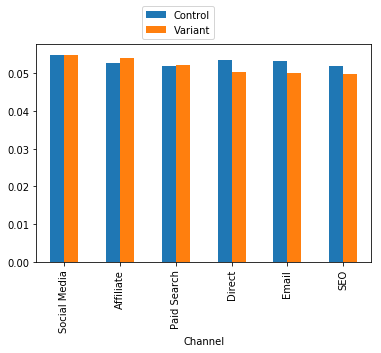

In [24]:
user_barplot(test_df_2,control_df_2,'Channel')

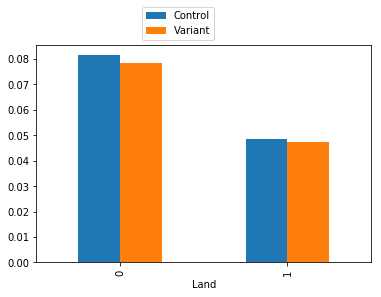

In [25]:
user_barplot(test_df_2,control_df_2,'Land')

Conversion rate that users who land on home page directly and make a purchase

In [39]:
user_purchased_direct_co=df.loc[df['Land']==1].Purchased_control.sum() / df.Visitors_Control.sum()
user_purchased_direct_va=df.loc[df['Land']==1].Purchased_variant.sum() / df.Visitors_Variant.sum()

print("The rate of user purchased directly in control group is: ", '{percent:.2%}'.format(percent=user_purchased_direct_co))
print("The rate of user purchased directly in variant group is: ", '{percent:.2%}'.format(percent=user_purchased_direct_va))


The rate of user purchased directly in control group is:  4.39%
The rate of user purchased directly in variant group is:  4.19%


Until now, we could see that the conversion rate of variant group is always less than the control group.
In order to get a confident conclusion, we should build a hypothesis test to see whether the conversion rate difference between variant and control group is significant.

Thus, we do a hypothesis testing as below:
Null hypothesis: conversion rate of control = conversion rate of variant(CR_Control = CR_Variant)
Alternative hypothesis: conversion rate of variant < conversion rate of control(CR_Variant < CR_Control)

3 Hypothesis Test: 
Two-Sample one-side Z-test 

In [26]:
from scipy import stats
from statsmodels.stats import weightstats as stests

Control_Size=df.Visitors_Control.sum()
Variant_Size=df.Visitors_Variant.sum()

def get_zvalue(CR_Control,CR_Variant,Control_Size,Variant_Size):
    
    z_value=(CR_Control-CR_Variant)/(((CR_Control*(1-CR_Control)/Control_Size) + (CR_Variant*(1-CR_Variant)/Variant_Size))**0.5)
            
    return z_value

In [27]:
z_value=get_zvalue(CR_Control,CR_Variant,Control_Size,Variant_Size)
z_value

13.724030874277233

In [28]:
#calculate the p-value for one side
import scipy
p_value=scipy.stats.norm.sf(abs(get_zvalue(CR_Control,CR_Variant,Control_Size,Variant_Size)))
p_value

3.644866619804864e-43

Therefore the p_value of this hypothesis test shows a strong evidence that we need to reject the null hypothesis,
which is that CR_Control is not equal to the CR_Variant.

3 Hypothesis Test 2: 
Two-Sample one-side Z-test on conversion rate of social media on both groups

In [33]:
z_value_2=get_zvalue(0.0628,0.0631,Control_Size,Variant_Size)
p_value=scipy.stats.norm.sf(abs(z_value_2))
p_value

0.06449535662679289

In [32]:
z_value_2

-1.518093961392048